<a href="https://colab.research.google.com/github/jrfanfan/CSE450project/blob/main/winequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to model wine quality based on physicochemical tests.

In [1]:


# Import necessary dependencies
# We wil use matplotlib and seaborn for exploratory data analysis and visualizations
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

Data preprocessing.

In [2]:
!pip install wget
!python -m wget -o winequality-red.csv "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
!python -m wget -o winequality-white.csv "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
!python -m wget -o winequality.names "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names"


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=08af5c3b8e56274a7fe963c6d465e97435bec695e2d4d4718737e352f0188606
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget

Saved under winequality-red.csv

Saved under winequality-white.csv

Saved under winequality.names


Load and merge datasets

In [3]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

# store wine type as an attribute
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'
# bucket wine quality scores into qualitative quality labels
# Wine quality scores of 3, 4, and 5 are mapped to low quality,
# 6 and 7 are mapped to medium quality, 8 and 9 are mapped to high quality
# wines under the quality_label attribute.
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
                                                          if value <= 5 else 'medium'
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
                                                              if value <= 5 else 'medium'
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
                                             categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])
# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [4]:
wines.info()
print('The white wine' , {white_wine.shape})
print('The red wine', {red_wine.shape})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  wine_type             6497 non-null   object  
 13  quality_label         6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

Description.


In [5]:
# Let’s build a descriptive summary table on various wine attributes separated by wine type.
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs], axis=1, keys=['Red Wine Statistics '])


Red Wine Statistics                                           \
            residual sugar total sulfur dioxide sulphates  alcohol   
count              1599.00              1599.00   1599.00  1599.00   
mean                  2.54                46.47      0.66    10.42   
std                   1.41                32.90      0.17     1.07   
min                   0.90                 6.00      0.33     8.40   
25%                   1.90                22.00      0.55     9.50   
50%                   2.20                38.00      0.62    10.20   
75%                   2.60                62.00      0.73    11.10   
max                  15.50               289.00      2.00    14.90   

                                 
      volatile acidity  quality  
count          1599.00  1599.00  
mean              0.53     5.64  
std               0.18     0.81  
min               0.12     3.00  
25%               0.39     5.00  
50%               0.52     6.00  
75%               0.64     6.00  
max               1.58     8.00

In [6]:
pd.concat([ws], axis=1, keys=['White Wine Statistics '])

White Wine Statistics                                           \
              residual sugar total sulfur dioxide sulphates  alcohol   
count                4898.00              4898.00   4898.00  4898.00   
mean                    6.39               138.36      0.49    10.51   
std                     5.07                42.50      0.11     1.23   
min                     0.60                 9.00      0.22     8.00   
25%                     1.70               108.00      0.41     9.50   
50%                     5.20               134.00      0.47    10.40   
75%                     9.90               167.00      0.55    11.40   
max                    65.80               440.00      1.08    14.20   

                                 
      volatile acidity  quality  
count          4898.00  4898.00  
mean              0.28     5.88  
std               0.10     0.89  
min               0.08     3.00  
25%               0.21     5.00  
50%               0.26     6.00  
75%               0.32     6.00  
max               1.10     9.00

Visualiztion


Text(0, 0.5, 'Wine pH')

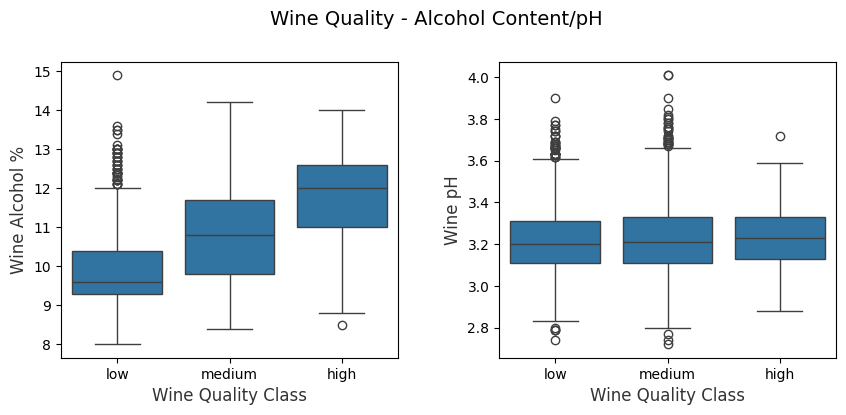

In [7]:
# We can even visualize these two features and observe the means.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.suptitle('Wine Quality - Alcohol Content/pH', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.boxplot(x="quality_label", y="alcohol",
            data=wines, ax=ax1)
ax1.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="pH", data=wines, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine pH",size = 12,alpha=0.8)

 Partition the Data into Features and Targets

In [8]:
# Create a new dataframe called X and y that contian the features we're going
# to use to make predictions.
X = wines.drop(['quality_label', 'wine_type'], axis=1)
y = wines['quality_label']


Split the data into training and test sets.


In [9]:
# Import and use the train_test_split() function to split the X and y
# dataframes into training and test sets.
#
# The training data should contain 80% of the samples and
# the test data should contain 20% of the samples.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1916,7.2,0.17,0.34,6.4,0.042,16.0,111.0,0.99278,2.99,0.40,10.8,6
947,6.7,0.23,0.17,1.3,0.061,14.0,100.0,0.99250,3.07,0.55,9.5,5
877,7.9,0.16,0.30,4.8,0.037,37.0,171.0,0.99670,3.47,0.44,9.0,4
2927,7.4,0.21,0.27,1.2,0.041,27.0,99.0,0.99270,3.19,0.33,9.8,6
6063,9.9,0.54,0.26,2.0,0.111,7.0,60.0,0.99709,2.94,0.98,10.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,5.7,0.18,0.26,2.2,0.023,21.0,95.0,0.98930,3.07,0.54,12.3,6
5191,6.6,0.23,0.30,14.9,0.051,33.0,118.0,0.99835,3.04,0.54,9.0,6
5226,6.2,0.30,0.33,3.5,0.037,37.0,155.0,0.98987,3.18,0.37,12.4,6
5390,8.4,0.62,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8,6


Create and Train a Model

In [10]:
# model.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")






Accuracy: 1.00


In [11]:
# using proper metrics, understanding limitations.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

        high       1.00      1.00      1.00        36
         low       1.00      1.00      1.00       454
      medium       1.00      1.00      1.00       810

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [12]:
# Import the confusion_matrix function and use it to generate a confusion
# matrix of our model results.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 36,   0,   0],
       [  0, 454,   0],
       [  0,   0, 810]])

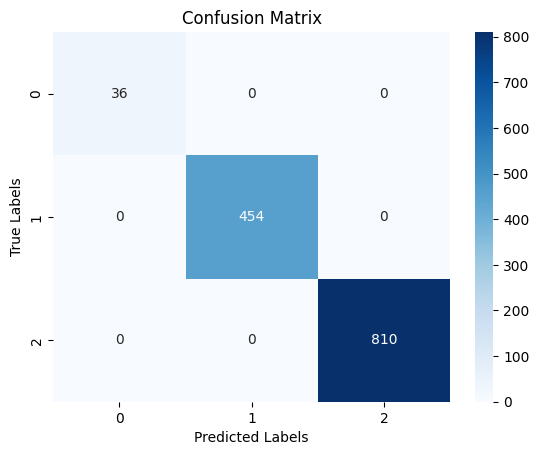

In [13]:
# Create a Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()